In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("C:/Users/Amech/Desktop/CS 160/Final Project/Final Project Data - Sheet1.csv")

In [2]:
df["Date"] = pd.to_datetime(df["Date"])
# Extract the numerical representation of datetime (number of days since a reference date)
df["Date_numeric"] = (df["Date"] - df["Date"].min()) / np.timedelta64(1, 'D')

# Drop the original "Date" column
df = df.drop(columns=["Date"])

In [3]:
df_one_hot = df.copy()

In [4]:
df_label = df.copy()

In [5]:
#Convert categorical columns "Away Team" and "Home Team" to binary (1 if "Clark", 0 otherwise)
c = 0
for value in df_label["Away Team"]:
    if value == "Clark":
        df_label.at[c,"Away Team"] = 1
    else:
        df_label.at[c,"Away Team"] = 0
    c = c + 1
df_label["Away Team"] = df_label["Away Team"].astype("int64")

c1 = 0
for value in df_label["Home Team"]:
    if value == "Clark":
        df_label.at[c1,"Home Team"] = 1
    else:
        df_label.at[c1,"Home Team"] = 0
    c1 = c1 + 1
df_label["Home Team"] = df_label["Home Team"].astype("int64")

In [6]:
#Using one hot encoding to reformat the data to make it easier for the random forest to compute
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

features_to_encode = ["Home Team","Away Team"]

for feature in features_to_encode:
    df_one_hot = encode_and_bind(df_one_hot, feature)

In [7]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Home Team      85 non-null     int64  
 1   Away Team      85 non-null     int64  
 2   H_Prev_Season  85 non-null     int64  
 3   A_Prev_Season  85 non-null     int64  
 4   FT_Home Goals  85 non-null     int64  
 5   FT_Away Goals  85 non-null     int64  
 6   H_Team Shots   85 non-null     int64  
 7   A_Team Shots   85 non-null     int64  
 8   H_Team Shot %  85 non-null     float64
 9   A_Team Shot %  85 non-null     float64
 10  H_Team SOG     85 non-null     int64  
 11  A_Team SOG     85 non-null     int64  
 12  H_Team SOG %   85 non-null     float64
 13  A_Team SOG %   85 non-null     float64
 14  HT_Corners     85 non-null     int64  
 15  AT_Corners     85 non-null     int64  
 16  HT_Red         85 non-null     int64  
 17  AT_Red         85 non-null     int64  
 18  HT_Yellow   

In [8]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   H_Prev_Season           85 non-null     int64  
 1   A_Prev_Season           85 non-null     int64  
 2   FT_Home Goals           85 non-null     int64  
 3   FT_Away Goals           85 non-null     int64  
 4   H_Team Shots            85 non-null     int64  
 5   A_Team Shots            85 non-null     int64  
 6   H_Team Shot %           85 non-null     float64
 7   A_Team Shot %           85 non-null     float64
 8   H_Team SOG              85 non-null     int64  
 9   A_Team SOG              85 non-null     int64  
 10  H_Team SOG %            85 non-null     float64
 11  A_Team SOG %            85 non-null     float64
 12  HT_Corners              85 non-null     int64  
 13  AT_Corners              85 non-null     int64  
 14  HT_Red                  85 non-null     int6

In [9]:
#original graph with binary values
display(df_label)

,Home Team,Away Team,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,...,HT_Corners,AT_Corners,HT_Red,AT_Red,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark),Date_numeric
0,0,1,4,5,2,3,9,8,0.222,0.375,...,6,7,0,0,1,1,10,6,2,0.0
1,0,1,7,5,1,1,15,16,0.067,0.063,...,6,2,0,0,2,1,15,12,1,7.0
2,1,0,5,2,1,2,7,13,0.143,0.154,...,1,4,0,0,2,2,0,0,0,14.0
3,1,0,5,6,2,2,13,15,0.154,0.133,...,6,6,0,0,2,1,0,0,1,21.0
4,0,1,3,5,1,0,19,7,0.053,0.000,...,5,2,0,0,1,0,12,9,0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,0,2,7,2,0,22,4,0.091,0.000,...,10,2,0,0,1,0,10,10,0,4396.0
81,0,0,4,7,4,0,26,15,0.154,0.000,...,3,2,0,1,1,1,0,0,0,4403.0
82,0,0,8,7,1,0,15,11,0.067,0.000,...,4,4,0,0,3,1,17,12,0,4410.0
83,0,0,5,7,4,1,20,17,0.200,0.059,...,8,5,0,0,0,3,8,5,0,4417.0


In [10]:
#one hot encoded graph from clark perspective
display(df_one_hot)

,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,H_Team SOG,A_Team SOG,...,Away Team_Coast Guard,Away Team_Coast Guard,Away Team_Emerson,Away Team_MIT,Away Team_MIT,Away Team_Springfield,Away Team_Springfield,Away Team_WPI,Away Team_Wheaton,Away Team_Wheaton
0,4,5,2,3,9,8,0.222,0.375,5,6,...,0,0,0,0,0,0,0,0,0,0
1,7,5,1,1,15,16,0.067,0.063,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,2,1,2,7,13,0.143,0.154,3,9,...,0,0,0,0,0,0,0,0,1,0
3,5,6,2,2,13,15,0.154,0.133,7,6,...,0,0,0,0,0,1,0,0,0,0
4,3,5,1,0,19,7,0.053,0.000,8,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2,7,2,0,22,4,0.091,0.000,10,1,...,0,0,0,0,0,0,0,0,0,0
81,4,7,4,0,26,15,0.154,0.000,7,6,...,0,0,0,0,0,0,0,0,0,0
82,8,7,1,0,15,11,0.067,0.000,5,4,...,0,0,0,0,0,0,0,0,0,0
83,5,7,4,1,20,17,0.200,0.059,7,6,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y = df_label["Result(Clark)"]
X = df_label.drop(columns = ["Result(Clark)"])

In [12]:
#initializing the training data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
classify = RandomForestClassifier(random_state=0, criterion='gini', min_samples_split = 2)
classify.fit(X_train1, y_train1)

RandomForestClassifier(random_state=0)

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
predictions_test = classify.predict(X_test1)
current_accuracy = accuracy_score(y_test1, predictions_test)
print("current accuracy: ", current_accuracy)

current accuracy:  0.5769230769230769


In [15]:
current_precision = precision_score(y_test1, predictions_test, average = 'micro')
print("current precision: ", current_precision)

current precision:  0.5769230769230769


In [16]:
y1 = df_one_hot["Result(Clark)"]
X1 = df_one_hot.drop(columns = ["Result(Clark)"])

In [17]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [18]:
classifier = RandomForestClassifier(random_state=0, criterion='gini', min_samples_split=2)
classifier.fit(X_train1, y_train1)

RandomForestClassifier(random_state=0)

In [19]:
#Evaluate the accuracy of the classifier on the test data
predict_test=classifier.predict(X_test1)

In [20]:
accuracy = accuracy_score(y_test1, predict_test)

# Display accuracy
print("Current Accuracy:", accuracy)

Current Accuracy: 0.5769230769230769


In [21]:
precision_score(y_test1, predictions_test, average = 'micro')

0.5769230769230769

In [22]:
temp = pd.DataFrame(classifier.predict_proba(X_test1).tolist(), columns=classifier.classes_)

In [23]:
temp['best_predict'] = temp.max(axis=1)

In [24]:
temp

,0,1,2,best_predict
0,0.58,0.20,0.22,0.58
1,0.60,0.11,0.29,0.60
2,0.63,0.10,0.27,0.63
3,0.79,0.07,0.14,0.79
4,0.60,0.20,0.20,0.60
5,0.84,0.12,0.04,0.84
6,0.81,0.14,0.05,0.81
7,0.88,0.01,0.11,0.88
8,0.96,0.01,0.03,0.96
9,0.74,0.10,0.16,0.74


In [25]:
combined = pd.DataFrame(dict(actual=y_test1, predicted=predict_test))

In [26]:
# Display a cross-tabulation of actual vs. predicted values
pd.crosstab(index=combined["actual"],columns=combined["predicted"])

predicted,0,2
actual,,
0,15,0
1,2,1
2,8,0


In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Perform a grid search for hyperparameter tuning
param_grid = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [28]:
classifier = RandomForestClassifier(random_state=0)

In [29]:
random_search = RandomizedSearchCV(classifier, param_distributions=param_grid, n_iter=100, cv=5, random_state=0, n_jobs=-1)
random_search.fit(X_train1, y_train1)
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 149}


In [30]:
print("Tuned Accuracy:", accuracy_score(y_test1, predict_test))

Tuned Accuracy: 0.5769230769230769


In [31]:
print("Tuned Precision:", precision_score(y_test1, predict_test, average='micro'))

Tuned Precision: 0.5769230769230769


In [32]:
df_oh_copy = df_one_hot.copy()
df_oh_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   H_Prev_Season           85 non-null     int64  
 1   A_Prev_Season           85 non-null     int64  
 2   FT_Home Goals           85 non-null     int64  
 3   FT_Away Goals           85 non-null     int64  
 4   H_Team Shots            85 non-null     int64  
 5   A_Team Shots            85 non-null     int64  
 6   H_Team Shot %           85 non-null     float64
 7   A_Team Shot %           85 non-null     float64
 8   H_Team SOG              85 non-null     int64  
 9   A_Team SOG              85 non-null     int64  
 10  H_Team SOG %            85 non-null     float64
 11  A_Team SOG %            85 non-null     float64
 12  HT_Corners              85 non-null     int64  
 13  AT_Corners              85 non-null     int64  
 14  HT_Red                  85 non-null     int6

In [33]:
y2 = df_oh_copy["Result(Clark)"]
specified_cols = ["A_Team SOG %"]
X2 = df_oh_copy[specified_cols]

In [34]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [35]:
clf2 = RandomForestClassifier(random_state=0,criterion='gini')
clf2.fit(X_train2,y_train2)

RandomForestClassifier(random_state=0)

In [36]:
predict_test = clf2.predict(X_test2)
accuracy_score(y_test2, predictions_test)

0.5769230769230769

In [37]:
precision_score(y_test2, predictions_test, average = 'micro')

0.5769230769230769

In [38]:
rolling_avg = df_one_hot.copy()
rolling_avg

,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,H_Team SOG,A_Team SOG,...,Away Team_Coast Guard,Away Team_Coast Guard,Away Team_Emerson,Away Team_MIT,Away Team_MIT,Away Team_Springfield,Away Team_Springfield,Away Team_WPI,Away Team_Wheaton,Away Team_Wheaton
0,4,5,2,3,9,8,0.222,0.375,5,6,...,0,0,0,0,0,0,0,0,0,0
1,7,5,1,1,15,16,0.067,0.063,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,2,1,2,7,13,0.143,0.154,3,9,...,0,0,0,0,0,0,0,0,1,0
3,5,6,2,2,13,15,0.154,0.133,7,6,...,0,0,0,0,0,1,0,0,0,0
4,3,5,1,0,19,7,0.053,0.000,8,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2,7,2,0,22,4,0.091,0.000,10,1,...,0,0,0,0,0,0,0,0,0,0
81,4,7,4,0,26,15,0.154,0.000,7,6,...,0,0,0,0,0,0,0,0,0,0
82,8,7,1,0,15,11,0.067,0.000,5,4,...,0,0,0,0,0,0,0,0,0,0
83,5,7,4,1,20,17,0.200,0.059,7,6,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df3 = df.copy()
df3

,Home Team,Away Team,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,...,HT_Corners,AT_Corners,HT_Red,AT_Red,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark),Date_numeric
0,WPI,Clark,4,5,2,3,9,8,0.222,0.375,...,6,7,0,0,1,1,10,6,2,0.0
1,Coast Guard,Clark,7,5,1,1,15,16,0.067,0.063,...,6,2,0,0,2,1,15,12,1,7.0
2,Clark,Wheaton,5,2,1,2,7,13,0.143,0.154,...,1,4,0,0,2,2,0,0,0,14.0
3,Clark,Springfield,5,6,2,2,13,15,0.154,0.133,...,6,6,0,0,2,1,0,0,1,21.0
4,MIT,Clark,3,5,1,0,19,7,0.053,0.000,...,5,2,0,0,1,0,12,9,0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Babson,Clark,2,7,2,0,22,4,0.091,0.000,...,10,2,0,0,1,0,10,10,0,4396.0
81,WPI,Clark,4,7,4,0,26,15,0.154,0.000,...,3,2,0,1,1,1,0,0,0,4403.0
82,Emerson,Clark,8,7,1,0,15,11,0.067,0.000,...,4,4,0,0,3,1,17,12,0,4410.0
83,Springfield,Clark,5,7,4,1,20,17,0.200,0.059,...,8,5,0,0,0,3,8,5,0,4417.0


In [40]:
df.columns

Index(['Home Team', 'Away Team', 'H_Prev_Season', 'A_Prev_Season',
       'FT_Home Goals', 'FT_Away Goals', 'H_Team Shots', 'A_Team Shots',
       'H_Team Shot %', 'A_Team Shot %', 'H_Team SOG', 'A_Team SOG',
       'H_Team SOG %', 'A_Team SOG %', 'HT_Corners', 'AT_Corners', 'HT_Red',
       'AT_Red', 'HT_Yellow', 'AT_Yellow', 'HT_Fouls', 'AT_Fouls',
       'Result(Clark)', 'Date_numeric'],
      dtype='object')

In [41]:
opponent = []
teamteam = []
venue = []

count = 0


for team in df3["Home Team"]:
    if team == "Clark":
        teamteam.append(team)
        opponent.append(df3.at[count,"Away Team"])
        venue.append("Home")
    else:
        opponent.append(team)
        teamteam.append(df3.at[count,"Away Team"])
        venue.append("Away")
    count = count + 1

In [42]:
df3["Team"] = teamteam
df3["Opponent"] = opponent
df3["Venue"] = venue
df3

,Home Team,Away Team,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,...,AT_Red,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark),Date_numeric,Team,Opponent,Venue
0,WPI,Clark,4,5,2,3,9,8,0.222,0.375,...,0,1,1,10,6,2,0.0,Clark,WPI,Away
1,Coast Guard,Clark,7,5,1,1,15,16,0.067,0.063,...,0,2,1,15,12,1,7.0,Clark,Coast Guard,Away
2,Clark,Wheaton,5,2,1,2,7,13,0.143,0.154,...,0,2,2,0,0,0,14.0,Clark,Wheaton,Home
3,Clark,Springfield,5,6,2,2,13,15,0.154,0.133,...,0,2,1,0,0,1,21.0,Clark,Springfield,Home
4,MIT,Clark,3,5,1,0,19,7,0.053,0.000,...,0,1,0,12,9,0,35.0,Clark,MIT,Away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Babson,Clark,2,7,2,0,22,4,0.091,0.000,...,0,1,0,10,10,0,4396.0,Clark,Babson,Away
81,WPI,Clark,4,7,4,0,26,15,0.154,0.000,...,1,1,1,0,0,0,4403.0,Clark,WPI,Away
82,Emerson,Clark,8,7,1,0,15,11,0.067,0.000,...,0,3,1,17,12,0,4410.0,Clark,Emerson,Away
83,Springfield,Clark,5,7,4,1,20,17,0.200,0.059,...,0,0,3,8,5,0,4417.0,Clark,Springfield,Away


In [43]:
df3 = df3.drop(columns = ["Home Team","Away Team"])

In [44]:
b1 = df3.pop("H_Prev_Season")
b2 = df3.pop("A_Prev_Season")
new_col1 = []

coun = 0
for val in df3["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df3["Prev_Season"] = new_col1
df3

,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,H_Team SOG,A_Team SOG,H_Team SOG %,A_Team SOG %,...,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark),Date_numeric,Team,Opponent,Venue,Prev_Season
0,2,3,9,8,0.222,0.375,5,6,0.556,0.750,...,1,1,10,6,2,0.0,Clark,WPI,Away,5
1,1,1,15,16,0.067,0.063,0,0,0.000,0.000,...,2,1,15,12,1,7.0,Clark,Coast Guard,Away,5
2,1,2,7,13,0.143,0.154,3,9,0.429,0.692,...,2,2,0,0,0,14.0,Clark,Wheaton,Home,5
3,2,2,13,15,0.154,0.133,7,6,0.538,0.400,...,2,1,0,0,1,21.0,Clark,Springfield,Home,5
4,1,0,19,7,0.053,0.000,8,3,0.421,0.429,...,1,0,12,9,0,35.0,Clark,MIT,Away,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2,0,22,4,0.091,0.000,10,1,0.455,0.250,...,1,0,10,10,0,4396.0,Clark,Babson,Away,7
81,4,0,26,15,0.154,0.000,7,6,0.269,0.400,...,1,1,0,0,0,4403.0,Clark,WPI,Away,7
82,1,0,15,11,0.067,0.000,5,4,0.333,0.364,...,3,1,17,12,0,4410.0,Clark,Emerson,Away,7
83,4,1,20,17,0.200,0.059,7,6,0.350,0.353,...,0,3,8,5,0,4417.0,Clark,Springfield,Away,7


In [45]:
b1 = df3.pop("FT_Home Goals")
b2 = df3.pop("FT_Away Goals")
new_col1 = []

coun = 0
for val in df3["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df3["Goals"] = new_col1
df3

,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,H_Team SOG,A_Team SOG,H_Team SOG %,A_Team SOG %,HT_Corners,AT_Corners,...,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark),Date_numeric,Team,Opponent,Venue,Prev_Season,Goals
0,9,8,0.222,0.375,5,6,0.556,0.750,6,7,...,1,10,6,2,0.0,Clark,WPI,Away,5,3
1,15,16,0.067,0.063,0,0,0.000,0.000,6,2,...,1,15,12,1,7.0,Clark,Coast Guard,Away,5,1
2,7,13,0.143,0.154,3,9,0.429,0.692,1,4,...,2,0,0,0,14.0,Clark,Wheaton,Home,5,1
3,13,15,0.154,0.133,7,6,0.538,0.400,6,6,...,1,0,0,1,21.0,Clark,Springfield,Home,5,2
4,19,7,0.053,0.000,8,3,0.421,0.429,5,2,...,0,12,9,0,35.0,Clark,MIT,Away,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,22,4,0.091,0.000,10,1,0.455,0.250,10,2,...,0,10,10,0,4396.0,Clark,Babson,Away,7,0
81,26,15,0.154,0.000,7,6,0.269,0.400,3,2,...,1,0,0,0,4403.0,Clark,WPI,Away,7,0
82,15,11,0.067,0.000,5,4,0.333,0.364,4,4,...,1,17,12,0,4410.0,Clark,Emerson,Away,7,0
83,20,17,0.200,0.059,7,6,0.350,0.353,8,5,...,3,8,5,0,4417.0,Clark,Springfield,Away,7,1


In [46]:
b1 = df3.pop("H_Team Shots")
b2 = df3.pop("A_Team Shots")
new_col1 = []

coun = 0
for val in df3["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df3["Shots"] = new_col1
df3

,H_Team Shot %,A_Team Shot %,H_Team SOG,A_Team SOG,H_Team SOG %,A_Team SOG %,HT_Corners,AT_Corners,HT_Red,AT_Red,...,HT_Fouls,AT_Fouls,Result(Clark),Date_numeric,Team,Opponent,Venue,Prev_Season,Goals,Shots
0,0.222,0.375,5,6,0.556,0.750,6,7,0,0,...,10,6,2,0.0,Clark,WPI,Away,5,3,8
1,0.067,0.063,0,0,0.000,0.000,6,2,0,0,...,15,12,1,7.0,Clark,Coast Guard,Away,5,1,16
2,0.143,0.154,3,9,0.429,0.692,1,4,0,0,...,0,0,0,14.0,Clark,Wheaton,Home,5,1,7
3,0.154,0.133,7,6,0.538,0.400,6,6,0,0,...,0,0,1,21.0,Clark,Springfield,Home,5,2,13
4,0.053,0.000,8,3,0.421,0.429,5,2,0,0,...,12,9,0,35.0,Clark,MIT,Away,5,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.091,0.000,10,1,0.455,0.250,10,2,0,0,...,10,10,0,4396.0,Clark,Babson,Away,7,0,4
81,0.154,0.000,7,6,0.269,0.400,3,2,0,1,...,0,0,0,4403.0,Clark,WPI,Away,7,0,15
82,0.067,0.000,5,4,0.333,0.364,4,4,0,0,...,17,12,0,4410.0,Clark,Emerson,Away,7,0,11
83,0.200,0.059,7,6,0.350,0.353,8,5,0,0,...,8,5,0,4417.0,Clark,Springfield,Away,7,1,17


In [47]:
b1 = df3.pop("H_Team Shot %")
b2 = df3.pop("A_Team Shot %")
new_col1 = []

coun = 0
for val in df3["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df3["Shot %"] = new_col1
df3

,H_Team SOG,A_Team SOG,H_Team SOG %,A_Team SOG %,HT_Corners,AT_Corners,HT_Red,AT_Red,HT_Yellow,AT_Yellow,...,AT_Fouls,Result(Clark),Date_numeric,Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %
0,5,6,0.556,0.750,6,7,0,0,1,1,...,6,2,0.0,Clark,WPI,Away,5,3,8,0.375
1,0,0,0.000,0.000,6,2,0,0,2,1,...,12,1,7.0,Clark,Coast Guard,Away,5,1,16,0.063
2,3,9,0.429,0.692,1,4,0,0,2,2,...,0,0,14.0,Clark,Wheaton,Home,5,1,7,0.143
3,7,6,0.538,0.400,6,6,0,0,2,1,...,0,1,21.0,Clark,Springfield,Home,5,2,13,0.154
4,8,3,0.421,0.429,5,2,0,0,1,0,...,9,0,35.0,Clark,MIT,Away,5,0,7,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,10,1,0.455,0.250,10,2,0,0,1,0,...,10,0,4396.0,Clark,Babson,Away,7,0,4,0.000
81,7,6,0.269,0.400,3,2,0,1,1,1,...,0,0,4403.0,Clark,WPI,Away,7,0,15,0.000
82,5,4,0.333,0.364,4,4,0,0,3,1,...,12,0,4410.0,Clark,Emerson,Away,7,0,11,0.000
83,7,6,0.350,0.353,8,5,0,0,0,3,...,5,0,4417.0,Clark,Springfield,Away,7,1,17,0.059


In [48]:
b1 = df3.pop("H_Team SOG")
b2 = df3.pop("A_Team SOG")
new_col1 = []

coun = 0
for val in df3["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df3["SOG"] = new_col1
df3

,H_Team SOG %,A_Team SOG %,HT_Corners,AT_Corners,HT_Red,AT_Red,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark),Date_numeric,Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG
0,0.556,0.750,6,7,0,0,1,1,10,6,2,0.0,Clark,WPI,Away,5,3,8,0.375,6
1,0.000,0.000,6,2,0,0,2,1,15,12,1,7.0,Clark,Coast Guard,Away,5,1,16,0.063,0
2,0.429,0.692,1,4,0,0,2,2,0,0,0,14.0,Clark,Wheaton,Home,5,1,7,0.143,3
3,0.538,0.400,6,6,0,0,2,1,0,0,1,21.0,Clark,Springfield,Home,5,2,13,0.154,7
4,0.421,0.429,5,2,0,0,1,0,12,9,0,35.0,Clark,MIT,Away,5,0,7,0.000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.455,0.250,10,2,0,0,1,0,10,10,0,4396.0,Clark,Babson,Away,7,0,4,0.000,1
81,0.269,0.400,3,2,0,1,1,1,0,0,0,4403.0,Clark,WPI,Away,7,0,15,0.000,6
82,0.333,0.364,4,4,0,0,3,1,17,12,0,4410.0,Clark,Emerson,Away,7,0,11,0.000,4
83,0.350,0.353,8,5,0,0,0,3,8,5,0,4417.0,Clark,Springfield,Away,7,1,17,0.059,6


In [51]:
b1 = df3.pop("HT_Corners")
b2 = df3.pop("AT_Corners")
new_col1 = []

coun = 0
for val in df3["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df3["Corners"] = new_col1
df3

KeyError: 'HT_Corners'

In [ ]:
b1 = df3.pop("HT_Red")
b2 = df3.pop("AT_Red")
new_col1 = []

coun = 0
for val in df3["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df3["Red"] = new_col1
df3

In [54]:
b1 = df3.pop("HT_Yellow")
b2 = df3.pop("AT_Yellow")
new_col1 = []

coun = 0
for val in df3["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df3["Yellow"] = new_col1
df3

,H_Team SOG %,A_Team SOG %,HT_Fouls,AT_Fouls,Result(Clark),Date_numeric,Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,Corners,Red,Yellow
0,0.556,0.750,10,6,2,0.0,Clark,WPI,Away,5,3,8,0.375,6,7,0,1
1,0.000,0.000,15,12,1,7.0,Clark,Coast Guard,Away,5,1,16,0.063,0,2,0,1
2,0.429,0.692,0,0,0,14.0,Clark,Wheaton,Home,5,1,7,0.143,3,1,0,2
3,0.538,0.400,0,0,1,21.0,Clark,Springfield,Home,5,2,13,0.154,7,6,0,2
4,0.421,0.429,12,9,0,35.0,Clark,MIT,Away,5,0,7,0.000,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.455,0.250,10,10,0,4396.0,Clark,Babson,Away,7,0,4,0.000,1,2,0,0
81,0.269,0.400,0,0,0,4403.0,Clark,WPI,Away,7,0,15,0.000,6,2,1,1
82,0.333,0.364,17,12,0,4410.0,Clark,Emerson,Away,7,0,11,0.000,4,4,0,1
83,0.350,0.353,8,5,0,4417.0,Clark,Springfield,Away,7,1,17,0.059,6,5,0,3


In [55]:
b1 = df3.pop("HT_Fouls")
b2 = df3.pop("AT_Fouls")
new_col1 = []

coun = 0
for val in df3["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df3["Fouls"] = new_col1
df3

,H_Team SOG %,A_Team SOG %,Result(Clark),Date_numeric,Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,Corners,Red,Yellow,Fouls
0,0.556,0.750,2,0.0,Clark,WPI,Away,5,3,8,0.375,6,7,0,1,6
1,0.000,0.000,1,7.0,Clark,Coast Guard,Away,5,1,16,0.063,0,2,0,1,12
2,0.429,0.692,0,14.0,Clark,Wheaton,Home,5,1,7,0.143,3,1,0,2,0
3,0.538,0.400,1,21.0,Clark,Springfield,Home,5,2,13,0.154,7,6,0,2,0
4,0.421,0.429,0,35.0,Clark,MIT,Away,5,0,7,0.000,3,2,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.455,0.250,0,4396.0,Clark,Babson,Away,7,0,4,0.000,1,2,0,0,10
81,0.269,0.400,0,4403.0,Clark,WPI,Away,7,0,15,0.000,6,2,1,1,0
82,0.333,0.364,0,4410.0,Clark,Emerson,Away,7,0,11,0.000,4,4,0,1,12
83,0.350,0.353,0,4417.0,Clark,Springfield,Away,7,1,17,0.059,6,5,0,3,5


In [56]:
b1 = df3.pop("H_Team SOG %")
b2 = df3.pop("A_Team SOG %")
new_col1 = []

coun = 0
for val in df3["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df3["SOG %"] = new_col1
df3

,Result(Clark),Date_numeric,Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,Corners,Red,Yellow,Fouls,SOG %
0,2,0.0,Clark,WPI,Away,5,3,8,0.375,6,7,0,1,6,0.750
1,1,7.0,Clark,Coast Guard,Away,5,1,16,0.063,0,2,0,1,12,0.000
2,0,14.0,Clark,Wheaton,Home,5,1,7,0.143,3,1,0,2,0,0.429
3,1,21.0,Clark,Springfield,Home,5,2,13,0.154,7,6,0,2,0,0.538
4,0,35.0,Clark,MIT,Away,5,0,7,0.000,3,2,0,0,9,0.429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,4396.0,Clark,Babson,Away,7,0,4,0.000,1,2,0,0,10,0.250
81,0,4403.0,Clark,WPI,Away,7,0,15,0.000,6,2,1,1,0,0.400
82,0,4410.0,Clark,Emerson,Away,7,0,11,0.000,4,4,0,1,12,0.364
83,0,4417.0,Clark,Springfield,Away,7,1,17,0.059,6,5,0,3,5,0.353


In [57]:
b1 = df3.pop("Result(Clark)")
df3["Result"] = b1
df3

,Date_numeric,Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,Corners,Red,Yellow,Fouls,SOG %,Result
0,0.0,Clark,WPI,Away,5,3,8,0.375,6,7,0,1,6,0.750,2
1,7.0,Clark,Coast Guard,Away,5,1,16,0.063,0,2,0,1,12,0.000,1
2,14.0,Clark,Wheaton,Home,5,1,7,0.143,3,1,0,2,0,0.429,0
3,21.0,Clark,Springfield,Home,5,2,13,0.154,7,6,0,2,0,0.538,1
4,35.0,Clark,MIT,Away,5,0,7,0.000,3,2,0,0,9,0.429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,4396.0,Clark,Babson,Away,7,0,4,0.000,1,2,0,0,10,0.250,0
81,4403.0,Clark,WPI,Away,7,0,15,0.000,6,2,1,1,0,0.400,0
82,4410.0,Clark,Emerson,Away,7,0,11,0.000,4,4,0,1,12,0.364,0
83,4417.0,Clark,Springfield,Away,7,1,17,0.059,6,5,0,3,5,0.353,0


In [58]:
df3 = df3.drop(columns=["Date_numeric"])

In [59]:
print("Reformatted Data:")
df3

Reformatted Data:


,Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,Corners,Red,Yellow,Fouls,SOG %,Result
0,Clark,WPI,Away,5,3,8,0.375,6,7,0,1,6,0.750,2
1,Clark,Coast Guard,Away,5,1,16,0.063,0,2,0,1,12,0.000,1
2,Clark,Wheaton,Home,5,1,7,0.143,3,1,0,2,0,0.429,0
3,Clark,Springfield,Home,5,2,13,0.154,7,6,0,2,0,0.538,1
4,Clark,MIT,Away,5,0,7,0.000,3,2,0,0,9,0.429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Clark,Babson,Away,7,0,4,0.000,1,2,0,0,10,0.250,0
81,Clark,WPI,Away,7,0,15,0.000,6,2,1,1,0,0.400,0
82,Clark,Emerson,Away,7,0,11,0.000,4,4,0,1,12,0.364,0
83,Clark,Springfield,Away,7,1,17,0.059,6,5,0,3,5,0.353,0


In [60]:
#general function for rolling average
fd = pd.read_csv("C:/Users/Amech/Desktop/CS 160/Final Project/Final Project Data.csv")

def new_df_spec(df, team):
    
    opponent = []
    teamteam = []
    venue = []

    count = 0

    for t in df["Home Team"]:
        if t == team:
            teamteam.append(team)
            opponent.append(df.at[count,"Away Team"])
            venue.append("Home")
        elif df.at[count,"Away Team"] == team:
            opponent.append(t)
            teamteam.append(df.at[count,"Away Team"])
            venue.append("Away")
        count = count + 1
    
    b1 = df.pop("H_Prev_Season")
    b2 = df.pop("A_Prev_Season")
    new_col1 = []

    coun = 0
    for val in df["Home Team"]:
        if val == team:
            new_col1.append(b1[coun])
        elif df.at[coun,"Away Team"] == team:
            new_col1.append(b2[coun])
        coun = coun + 1
        
    b3 = df.pop("FT_Home Goals")
    b4 = df.pop("FT_Away Goals")
    new_col2 = []

    coun1 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col2.append(b3[coun1])
        elif df.at[coun1,"Away Team"] == team:
            new_col2.append(b4[coun1])
        coun1 = coun1 + 1
    
    
    b5 = df.pop("H_Team Shots")
    b6 = df.pop("A_Team Shots")
    new_col3 = []

    coun2 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col3.append(b5[coun2])
        elif df.at[coun2,"Away Team"] == team:
            new_col3.append(b6[coun2])
        coun2 = coun2 + 1
    
    b7 = df.pop("H_Team Shot %")
    b8 = df.pop("A_Team Shot %")
    new_col4 = []

    coun3 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col4.append(b7[coun3])
        elif df.at[coun3,"Away Team"] == team:
            new_col4.append(b8[coun3])
        coun3 = coun3 + 1
    
    b9 = df.pop("H_Team SOG")
    b10 = df.pop("A_Team SOG")
    new_col5 = []

    coun4 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col5.append(b9[coun4])
        elif df.at[coun4,"Away Team"] == team:
            new_col5.append(b10[coun4])
        coun4 = coun4 + 1
    
    b11 = df.pop("H_Team SOG %")
    b12 = df.pop("A_Team SOG %")
    new_col6 = []

    coun5 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col6.append(b11[coun5])
        elif df.at[coun5,"Away Team"] == team:
            new_col6.append(b12[coun5])
        coun5 = coun5 + 1
        
    b13 = df.pop("HT_Corners")
    b14 = df.pop("AT_Corners")
    new_col7 = []

    coun6 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col7.append(b13[coun6])
        elif df.at[coun6,"Away Team"] == team:
            new_col7.append(b14[coun6])
        coun6 = coun6 + 1
    
    
    b15 = df.pop("HT_Red")
    b16 = df.pop("AT_Red")
    new_col8 = []

    coun7 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col8.append(b15[coun7])
        elif df.at[coun7,"Away Team"] == team:
            new_col8.append(b16[coun7])
        coun7 = coun7 + 1
    
    
    b17 = df.pop("HT_Yellow")
    b18 = df.pop("AT_Yellow")
    new_col9 = []

    coun8 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col9.append(b17[coun8])
        elif df.at[coun8,"Away Team"] == team:
            new_col9.append(b18[coun8])
        coun8 = coun8 + 1
    
    
    b19 = df.pop("HT_Fouls")
    b20 = df.pop("AT_Fouls")
    new_col10 = []

    coun9 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col10.append(b19[coun9])
        elif df.at[coun9,"Away Team"] == team:
            new_col10.append(b20[coun9])
        coun9 = coun9 + 1
        
    
    b21 = df.pop("Result(Clark)")
    new_col11 = []
    coun10 = 0
    
    if team == "Clark":
        new_col11 = b21
    else:
        for val in df["Home Team"]: 
            if val == team:
                if b21[coun10] == 2:
                    new_col11.append(0)
                elif b21[coun10] == 1:
                    new_col11.append(1)
                elif b21[coun10] == 0:
                    new_col11.append(2)
            elif df.at[coun10,"Away Team"] == team:
                if b21[coun10] == 2:
                    new_col11.append(0)
                elif b21[coun10] == 1:
                    new_col11.append(1)
                elif b21[coun10] == 0:
                    new_col11.append(2)
            coun10 = coun10 + 1
           
    new_df = pd.DataFrame({
        "Team": teamteam[:len(teamteam)],
        "Opponent": opponent[:len(opponent)],
        "Venue": venue[:len(venue)],
        "Prev_Season": new_col1[:len(new_col1)],
        "Goals": new_col2[:len(new_col2)],
        "Shots": new_col3[:len(new_col3)],
        "Shot %": new_col4[:len(new_col4)],
        "SOG": new_col5[:len(new_col5)],
        "SOG %": new_col6[:len(new_col6)],
        "Corners": new_col7[:len(new_col7)],
        "Red": new_col8[:len(new_col8)],
        "Yellow": new_col9[:len(new_col9)],
        "Fouls": new_col10[:len(new_col10)],
        "Result": new_col11[:len(new_col11)],
    })
    
    return new_df

m = new_df_spec(fd, "WPI")
m 

,Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow,Fouls,Result
0,WPI,Clark,Home,4,2,9,0.222,5,0.556,6,0,1,10,0
1,WPI,Clark,Away,4,3,16,0.188,8,0.500,3,0,1,12,2
2,WPI,Clark,Home,3,2,12,0.167,5,0.417,3,0,3,10,2
3,WPI,Clark,Away,6,2,7,0.286,3,0.429,1,0,1,12,2
4,WPI,Clark,Home,6,1,16,0.063,8,0.500,7,0,0,2,2
5,WPI,Clark,Away,4,2,16,0.125,5,0.313,7,0,3,8,2
6,WPI,Clark,Home,4,1,8,0.125,5,0.625,3,0,1,14,0
7,WPI,Clark,Away,6,0,12,0.000,9,0.750,1,0,1,6,0
8,WPI,Clark,Home,6,1,24,0.042,11,0.458,7,0,0,5,2
9,WPI,Clark,Away,2,2,12,0.167,8,0.667,5,0,0,13,2


In [61]:
C_1 = df3.copy()
C_1

,Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,Corners,Red,Yellow,Fouls,SOG %,Result
0,Clark,WPI,Away,5,3,8,0.375,6,7,0,1,6,0.750,2
1,Clark,Coast Guard,Away,5,1,16,0.063,0,2,0,1,12,0.000,1
2,Clark,Wheaton,Home,5,1,7,0.143,3,1,0,2,0,0.429,0
3,Clark,Springfield,Home,5,2,13,0.154,7,6,0,2,0,0.538,1
4,Clark,MIT,Away,5,0,7,0.000,3,2,0,0,9,0.429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Clark,Babson,Away,7,0,4,0.000,1,2,0,0,10,0.250,0
81,Clark,WPI,Away,7,0,15,0.000,6,2,1,1,0,0.400,0
82,Clark,Emerson,Away,7,0,11,0.000,4,4,0,1,12,0.364,0
83,Clark,Springfield,Away,7,1,17,0.059,6,5,0,3,5,0.353,0


In [62]:
mount = 0
for val in C_1["Venue"]:
    if val == "Home":
        C_1.at[mount, "Venue"] = 1
    else:
        C_1.at[mount, "Venue"] = 0
    mount = mount + 1

C_1

,Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,Corners,Red,Yellow,Fouls,SOG %,Result
0,Clark,WPI,0,5,3,8,0.375,6,7,0,1,6,0.750,2
1,Clark,Coast Guard,0,5,1,16,0.063,0,2,0,1,12,0.000,1
2,Clark,Wheaton,1,5,1,7,0.143,3,1,0,2,0,0.429,0
3,Clark,Springfield,1,5,2,13,0.154,7,6,0,2,0,0.538,1
4,Clark,MIT,0,5,0,7,0.000,3,2,0,0,9,0.429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Clark,Babson,0,7,0,4,0.000,1,2,0,0,10,0.250,0
81,Clark,WPI,0,7,0,15,0.000,6,2,1,1,0,0.400,0
82,Clark,Emerson,0,7,0,11,0.000,4,4,0,1,12,0.364,0
83,Clark,Springfield,0,7,1,17,0.059,6,5,0,3,5,0.353,0


In [63]:
C_1 = C_1.drop(columns = ["Team","Opponent"])
C_1

,Venue,Prev_Season,Goals,Shots,Shot %,SOG,Corners,Red,Yellow,Fouls,SOG %,Result
0,0,5,3,8,0.375,6,7,0,1,6,0.750,2
1,0,5,1,16,0.063,0,2,0,1,12,0.000,1
2,1,5,1,7,0.143,3,1,0,2,0,0.429,0
3,1,5,2,13,0.154,7,6,0,2,0,0.538,1
4,0,5,0,7,0.000,3,2,0,0,9,0.429,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,7,0,4,0.000,1,2,0,0,10,0.250,0
81,0,7,0,15,0.000,6,2,1,1,0,0.400,0
82,0,7,0,11,0.000,4,4,0,1,12,0.364,0
83,0,7,1,17,0.059,6,5,0,3,5,0.353,0


In [64]:
yy = C_1["Result"]
XX = C_1.drop(columns = ["Result"])
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=0)
classify = RandomForestClassifier(random_state=0,criterion='gini',min_samples_split=2)
classify.fit(XX_train,yy_train)

RandomForestClassifier(random_state=0)

In [65]:
predict=classify.predict(XX_test)
print("Modified Data Accuracy:", accuracy_score(yy_test, predict))

Modified Data Accuracy: 0.6153846153846154


In [66]:
#function for finding rolling averages
def rolling_averages(group, cols, new_cols):
    #group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [67]:
cols = ["Goals", "Shots", "Shot %", "SOG", "SOG %", "Corners", "Fouls"]
new_cols = [f"{c}_rolling" for c in cols]

h = rolling_averages(C_1, cols, new_cols)
h

,Venue,Prev_Season,Goals,Shots,Shot %,SOG,Corners,Red,Yellow,Fouls,SOG %,Result,Goals_rolling,Shots_rolling,Shot %_rolling,SOG_rolling,SOG %_rolling,Corners_rolling,Fouls_rolling
3,1,5,2,13,0.154,7,6,0,2,0,0.538,1,1.666667,10.333333,0.193667,3.000000,0.393000,3.333333,6.000000
4,0,5,0,7,0.000,3,2,0,0,9,0.429,0,1.333333,12.000000,0.120000,3.333333,0.322333,3.000000,4.000000
5,1,5,2,10,0.200,8,3,0,1,9,0.800,0,1.000000,9.000000,0.099000,4.333333,0.465333,3.000000,3.000000
6,1,5,2,15,0.133,7,6,0,0,6,0.467,0,1.333333,10.000000,0.118000,6.000000,0.589000,3.666667,6.000000
7,1,5,1,10,0.100,6,7,0,1,17,0.600,1,1.333333,10.666667,0.111000,6.000000,0.565333,3.666667,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,7,0,4,0.000,1,2,0,0,10,0.250,0,2.000000,12.666667,0.100000,6.333333,0.549000,2.666667,11.000000
81,0,7,0,15,0.000,6,2,1,1,0,0.400,0,1.666667,10.666667,0.066667,5.000000,0.465667,2.000000,10.666667
82,0,7,0,11,0.000,4,4,0,1,12,0.364,0,0.000000,7.333333,0.000000,3.000000,0.439000,1.333333,4.666667
83,0,7,1,17,0.059,6,5,0,3,5,0.353,0,0.000000,10.000000,0.000000,3.666667,0.338000,2.666667,7.333333


In [68]:
df_roll_2 = pd.read_csv("C:/Users/Amech/Desktop/CS 160/Final Project/Final Project Data.csv")

#Combining all the rolling average data
N_T = ["Clark","Babson","Coast Guard","Emerson","MIT","Springfield","Wheaton","WPI"]
C_2 = rolling_averages(new_df_spec(df_roll_2.copy(), N_T[0]),cols, new_cols)
C_3 = rolling_averages(new_df_spec(df_roll_2.copy(), N_T[1]),cols, new_cols)
C_4 = rolling_averages(new_df_spec(df_roll_2.copy(), N_T[2]),cols, new_cols)
C_5 = rolling_averages(new_df_spec(df_roll_2.copy(), N_T[3]),cols, new_cols)
C_6 = rolling_averages(new_df_spec(df_roll_2.copy(), N_T[4]),cols, new_cols)
C_7 = rolling_averages(new_df_spec(df_roll_2.copy(), N_T[5]),cols, new_cols)
C_8 = rolling_averages(new_df_spec(df_roll_2.copy(), N_T[6]),cols, new_cols)
C_9 = rolling_averages(new_df_spec(df_roll_2.copy(), N_T[7]),cols, new_cols)
DF_FIN = pd.concat([C_2, C_3, C_4, C_5, C_6, C_7, C_8, C_9], axis=0, ignore_index=True)
DF_FIN

,Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,...,Yellow,Fouls,Result,Goals_rolling,Shots_rolling,Shot %_rolling,SOG_rolling,SOG %_rolling,Corners_rolling,Fouls_rolling
0,Clark,Springfield,Home,5,2,13,0.154,7,0.538,6,...,2,0,1,1.666667,10.333333,0.193667,3.000000,0.393000,3.333333,6.000000
1,Clark,MIT,Away,5,0,7,0.000,3,0.429,2,...,0,9,0,1.333333,12.000000,0.120000,3.333333,0.322333,3.000000,4.000000
2,Clark,Babson,Home,5,2,10,0.200,8,0.800,3,...,1,9,0,1.000000,9.000000,0.099000,4.333333,0.465333,3.000000,3.000000
3,Clark,WPI,Home,5,2,15,0.133,7,0.467,6,...,0,6,0,1.333333,10.000000,0.118000,6.000000,0.589000,3.666667,6.000000
4,Clark,Coast Guard,Home,5,1,10,0.100,6,0.600,7,...,1,17,1,1.333333,10.666667,0.111000,6.000000,0.565333,3.666667,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,WPI,Clark,Home,6,1,24,0.042,11,0.458,7,...,0,5,2,1.000000,12.000000,0.083333,6.333333,0.562667,3.666667,9.333333
142,WPI,Clark,Away,2,2,12,0.167,8,0.667,5,...,0,13,2,0.666667,14.666667,0.055667,8.333333,0.611000,3.666667,8.333333
143,WPI,Clark,Home,2,1,24,0.042,12,0.500,5,...,0,8,2,1.000000,16.000000,0.069667,9.333333,0.625000,4.333333,8.000000
144,WPI,Clark,Away,2,1,27,0.407,11,0.407,7,...,2,19,1,1.333333,20.000000,0.083667,10.333333,0.541667,5.666667,8.666667


In [69]:
DF_FIN = DF_FIN.drop(columns = ["Team","Opponent"])

In [70]:
mount1 = 0
for val in DF_FIN["Venue"]:
    if val == "Home":
        DF_FIN.at[mount1, "Venue"] = 1
    else:
        DF_FIN.at[mount1, "Venue"] = 0
    mount1 = mount1 + 1

DF_FIN

,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow,Fouls,Result,Goals_rolling,Shots_rolling,Shot %_rolling,SOG_rolling,SOG %_rolling,Corners_rolling,Fouls_rolling
0,1,5,2,13,0.154,7,0.538,6,0,2,0,1,1.666667,10.333333,0.193667,3.000000,0.393000,3.333333,6.000000
1,0,5,0,7,0.000,3,0.429,2,0,0,9,0,1.333333,12.000000,0.120000,3.333333,0.322333,3.000000,4.000000
2,1,5,2,10,0.200,8,0.800,3,0,1,9,0,1.000000,9.000000,0.099000,4.333333,0.465333,3.000000,3.000000
3,1,5,2,15,0.133,7,0.467,6,0,0,6,0,1.333333,10.000000,0.118000,6.000000,0.589000,3.666667,6.000000
4,1,5,1,10,0.100,6,0.600,7,0,1,17,1,1.333333,10.666667,0.111000,6.000000,0.565333,3.666667,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,1,6,1,24,0.042,11,0.458,7,0,0,5,2,1.000000,12.000000,0.083333,6.333333,0.562667,3.666667,9.333333
142,0,2,2,12,0.167,8,0.667,5,0,0,13,2,0.666667,14.666667,0.055667,8.333333,0.611000,3.666667,8.333333
143,1,2,1,24,0.042,12,0.500,5,0,0,8,2,1.000000,16.000000,0.069667,9.333333,0.625000,4.333333,8.000000
144,0,2,1,27,0.407,11,0.407,7,0,2,19,1,1.333333,20.000000,0.083667,10.333333,0.541667,5.666667,8.666667


In [71]:
y_fin = DF_FIN["Result"]
X_fin = DF_FIN.drop(columns = ["Result"])
X_trainfin, X_testfin, y_trainfin, y_testfin = train_test_split(X_fin, y_fin, test_size=0.3, random_state=0)
clf = RandomForestClassifier(random_state=0,criterion='gini',min_samples_split=2)
clf.fit(X_trainfin,y_trainfin)

RandomForestClassifier(random_state=0)

In [72]:
predictions_test=clf.predict(X_testfin)
accuracy_score(y_testfin, predictions_test)
print("Final Accuracy:", accuracy_score(y_testfin, predictions_test))

Final Accuracy: 0.6818181818181818


In [99]:
def find_most_important_metrics(X, y, n=5, random_state=0, criterion='gini', min_samples_split=2):

    # Initialize the Random Forest classifier
    clf = RandomForestClassifier(random_state=random_state, criterion=criterion, min_samples_split=min_samples_split)

    # Fit the model
    clf.fit(X, y)

    # Get feature importances
    feature_importances = clf.feature_importances_

    # Create a DataFrame to store feature names and their importances
    important_features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

    # Sort features by importance in descending order
    important_features = important_features.sort_values(by='Importance', ascending=False)

    # Display the top 'n' features
    top_features = important_features.head(n)

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title(f'Top {n} Most Important Features')
    plt.show()

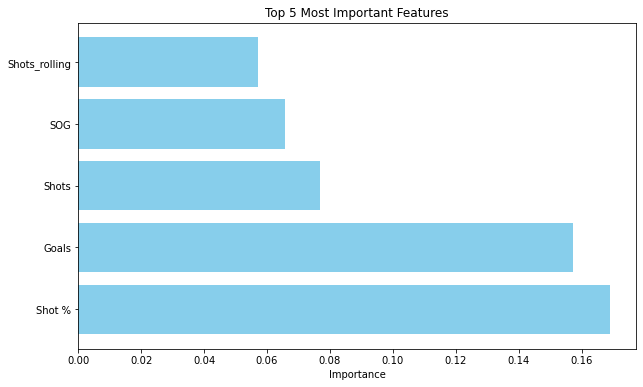

In [100]:
important_metrics = find_most_important_metrics(X_trainfin, y_trainfin, n=5, random_state=0)

In [84]:
#confusion matrix for the predicted and actual tests
combined = pd.DataFrame(dict(actual=y_testfin, predicted=predictions_test))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,2
actual,,
0,12,4
1,4,4
2,2,18


In [76]:
FINAL = RandomForestClassifier(random_state=0,criterion='gini',min_samples_split=2)

In [77]:
#2023 Prediction Table

In [78]:
DATA_2023 = pd.read_csv("C:/Users/Amech/Desktop/CS 160/Final Project/2023.csv")

DATA_2023 = new_df_spec(DATA_2023, "Clark")

countercounter = 0
for val in DATA_2023["Venue"]:
    if val == "Home":
        DATA_2023.at[countercounter, "Venue"] = 1
    else:
        DATA_2023.at[countercounter, "Venue"] = 0
    countercounter = countercounter + 1

DATA_2023 = DATA_2023.drop(columns = ["Team","Opponent"])

DATA_2023 = rolling_averages(DATA_2023, cols, new_cols)

DATA_2023_TRAIN = DATA_2023.iloc[:82]
DATA_2023_TEST = DATA_2023.iloc[82:]

DATA_2023

,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow,Fouls,Result,Goals_rolling,Shots_rolling,Shot %_rolling,SOG_rolling,SOG %_rolling,Corners_rolling,Fouls_rolling
3,1,5,2,13,0.154,7,0.538,6,0,2,0,1,1.666667,10.333333,0.193667,3.000000,0.393000,3.333333,6.000000
4,0,5,0,7,0.000,3,0.429,2,0,0,9,0,1.333333,12.000000,0.120000,3.333333,0.322333,3.000000,4.000000
5,1,5,2,10,0.200,8,0.800,3,0,1,9,0,1.000000,9.000000,0.099000,4.333333,0.465333,3.000000,3.000000
6,1,5,2,15,0.133,7,0.467,6,0,0,6,0,1.333333,10.000000,0.118000,6.000000,0.589000,3.666667,6.000000
7,1,5,1,10,0.100,6,0.600,7,0,1,17,1,1.333333,10.666667,0.111000,6.000000,0.565333,3.666667,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0,8,0,3,0.000,2,0.667,2,0,3,11,0,0.000000,6.666667,0.000000,1.333333,0.177667,1.666667,10.333333
88,1,8,0,8,0.000,1,0.125,5,0,0,16,0,0.000000,7.000000,0.000000,2.000000,0.400000,2.000000,10.000000
89,1,8,1,20,0.050,8,0.400,5,0,1,13,0,0.000000,8.666667,0.000000,2.000000,0.330667,3.000000,11.000000
90,1,8,0,9,0.000,1,0.111,2,0,0,15,1,0.333333,10.333333,0.016667,3.666667,0.397333,4.000000,13.333333


In [79]:
print(DATA_2023_TEST)

   Venue  Prev_Season  Goals  Shots  Shot %  SOG  SOG %  Corners  Red  Yellow  \
85     0            8      0      3   0.000    1  0.333        2    0       0   
86     1            8      0     15   0.000    3  0.200        2    0       1   
87     0            8      0      3   0.000    2  0.667        2    0       3   
88     1            8      0      8   0.000    1  0.125        5    0       0   
89     1            8      1     20   0.050    8  0.400        5    0       1   
90     1            8      0      9   0.000    1  0.111        2    0       0   
91     1            8      2     16   0.125   11  0.688        4    0       0   

    Fouls  Result  Goals_rolling  Shots_rolling  Shot %_rolling  SOG_rolling  \
85     13       0       0.333333      10.000000        0.019667     3.333333   
86      6       1       0.333333       7.333333        0.019667     2.333333   
87     11       0       0.000000       6.666667        0.000000     1.333333   
88     16       0       0.00000

In [80]:
FINAL.fit(DATA_2023_TRAIN.copy().drop(columns = ["Result"]),DATA_2023_TRAIN.copy()["Result"])
FINAL_PREDS = FINAL.predict(DATA_2023_TEST.copy().drop(columns = ["Result"]))
COMBINED = pd.DataFrame(dict(actual=DATA_2023_TEST["Result"], predicted=FINAL_PREDS), index=DATA_2023_TEST.index)

In [81]:
COMBINED

,actual,predicted
85,0,0
86,1,0
87,0,0
88,0,0
89,0,0
90,1,0
91,2,0


In [ ]:
#Accuracy shows that Random Forest is the best model for prediction despite
#predicting losses for every game in our 2023